<a href="https://colab.research.google.com/github/roshisaxena/prediction_of_car_price/blob/main/Cars_24_linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 24.4MB/s]


In [ ]:
df =  pd.read_csv("cars24-car-price-cleaned.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df["make"].nunique()

41

In [ ]:
df["model"].nunique()

3233

In [ ]:
df["make"].value_counts()

,count
make,
MARUTI,5650
HYUNDAI,3562
HONDA,1779
MAHINDRA,1276
TOYOTA,1189
TATA,971
FORD,900
VOLKSWAGEN,761
RENAULT,636


In [ ]:
df["make"] = df.groupby("make")["selling_price"].transform("mean")

In [ ]:
df["model"] = df.groupby("model")["selling_price"].transform("mean")

In [ ]:
df

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,6.50,2017.0,69480,23.59,1364.0,67.05,6.0,10.532763,7.075000,0,0,1,0,0,0,1,1,0
19816,9.25,2019.0,18000,17.50,1373.0,91.10,4.0,4.684721,7.128571,0,0,0,0,0,1,1,0,1
19817,4.25,2015.0,67000,21.14,1498.0,103.52,8.0,7.182097,4.454000,0,0,1,0,0,0,1,1,0
19818,12.25,2016.0,3800000,16.00,2179.0,140.00,7.0,7.315421,8.096522,0,0,1,0,0,0,1,0,1


In [ ]:
# train-test-split

from sklearn.model_selection import train_test_split

In [ ]:
y = df["selling_price"]
x = df.drop("selling_price",axis = 1)
y.shape,x.shape

((19820,), (19820, 17))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,
                                                 random_state = 1)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((13874, 17), (13874,), (5946, 17), (5946,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 8.94320251e-02, -1.35638241e-06, -4.05906554e-02,  2.29106553e-04,
        1.50304468e-03, -8.94320251e-02,  6.61474952e-02,  8.61386888e-01,
       -1.44630798e-01, -1.44855016e-01,  1.38520375e-01,  2.66216225e+00,
        3.30456609e-01, -1.36368445e-01, -8.04585280e-02, -3.35811569e-01,
       -4.86084483e-01])

In [ ]:
model.intercept_

-178.08232225367115

In [ ]:
y_test_predict = model.predict(x_test)

In [ ]:
y_test_predict

array([ 1.135053  ,  4.78976725,  5.96846351, ...,  1.20471131,
        3.08615105, 10.67406941])

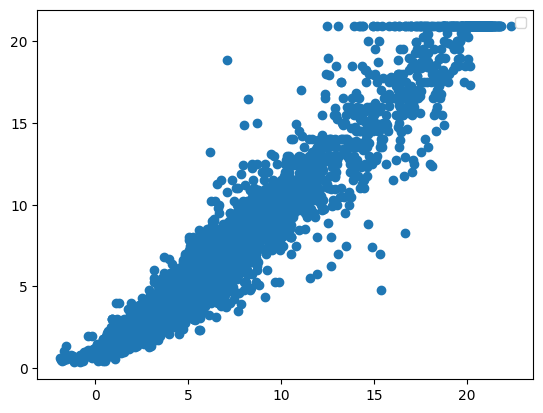

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_test_predict,y_test)
plt.legend()
plt.show()

In [ ]:
# Simple Linear Regression (We can take any other feature also, we can take model also of the car)

x1 = x[['km_driven']]
x1_train = x_train[['km_driven']]
x1_test = x_test[['km_driven']]

In [ ]:
model_s = LinearRegression()
model_s.fit(x1_train,y_train)

LinearRegression()

In [ ]:
print(model_s.coef_)
print(model_s.intercept_)

[-7.94990789e-06]
7.03013678949335


In [ ]:
y_hat = model_s.predict(x1_test)
y_hat

array([6.47364324, 6.56904213, 6.6326414 , ..., 6.6326414 , 6.39414416,
       6.27489554])

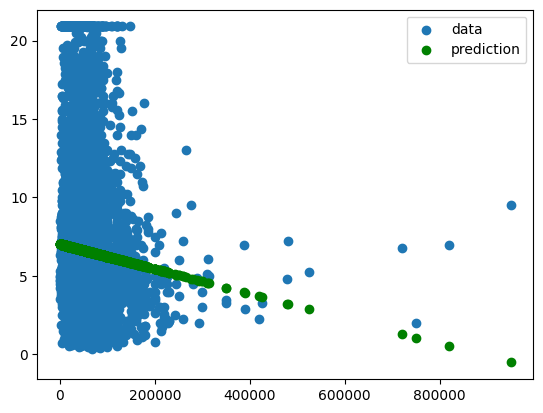

In [ ]:
fig = plt.figure()
plt.scatter(x1_test,y_test,label = 'data')
plt.scatter(x1_test,y_hat,color = 'green',label = 'prediction')
plt.legend()
plt.show()

In [ ]:
model.score(x_test,y_test)

0.9459835819294395

In [ ]:
# Feature Importance

In [ ]:
model.coef_

array([ 7.26831852e+11, -2.50610352e-01, -2.32537818e-01,  7.38776447e-02,
        4.70141495e-02,  7.26831852e+11,  6.62815814e-02,  8.59178586e-01,
       -7.22882618e-03, -7.02099753e-03,  7.03528760e-03,  1.32983308e-01,
        1.49877118e-02, -6.86552095e-03, -3.59124005e-03, -1.61993065e-02,
       -2.35818239e-02])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

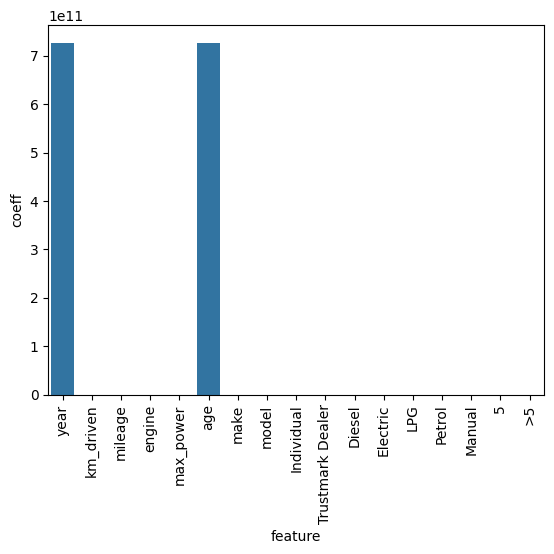

In [ ]:
import seaborn as sns

imp = pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),
                   columns = ['feature','coeff'])
sns.barplot(x = 'feature',y = 'coeff',data = imp)
plt.xticks(rotation = 90)

In [ ]:
x1 = x[['model']]
x1_train = x_train[['model']]
x1_test = x_test[['model']]

In [ ]:
model_s = LinearRegression()
model_s.fit(x1_train,y_train)

LinearRegression()

In [ ]:
print(model_s.coef_)
print(model_s.intercept_)

[0.99797519]
0.0070511352605366895


In [ ]:
y_hat = model_s.predict(x1_test)
y_hat

array([ 1.77845709,  4.70421739,  5.62897803, ...,  1.37801955,
        3.55699145, 10.76885266])

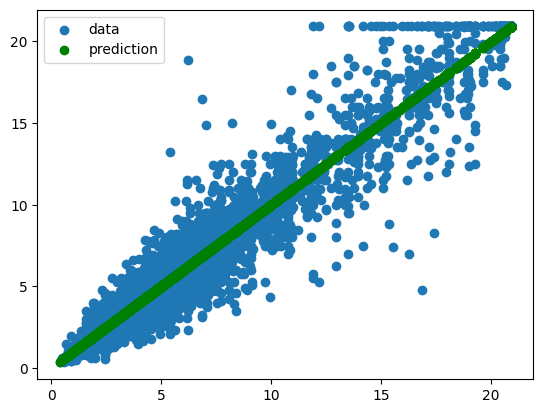

In [ ]:
fig = plt.figure()
plt.scatter(x1_test,y_test,label = 'data')
plt.scatter(x1_test,y_hat,color = 'green',label = 'prediction')
plt.legend()
plt.show()